# Lab: Factorial Experiments

In this lab you will explore how an experiment with multiple factors can be designed and the results explored. Specifically, you will work with a data containing **two independent factors**, if the player identifies with a character, and if the game is action or story driven. These relationships will be explored using linear models.

To begin, load the packages you will need by executing the code in the cell below. 

In [2]:
import numpy as np
import numpy.random as nr
from scipy.stats import truncnorm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

## matplotlib with display of graphs inline
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline

The code in the cell below generates a simulated data set for **two levels** for each of the two factors. The level of player engagement is measured for each set of factor values. There are equal numbers of samples for each possible combination of factor values, resulting in a **balanced 2x2 design**. 

Execute the code in the cell below and examine the resulting data frame of the data simulated data. 

In [3]:
## Create data frame with the data for the 4 cases of the factors
nr.seed(453)
n_cases = 120
df1 = pd.DataFrame([np.rint(truncnorm.rvs(0.0, 10.0, loc=6.0, scale=2.0, size=n_cases)),
                    ['IdentifyWithCharacter']*n_cases,
                    ['ActionDrivenLevel']*n_cases]).transpose()
df2 = pd.DataFrame([np.rint(truncnorm.rvs(0.0, 10.0, loc=6.0, scale=2.0, size=n_cases)),
                    ['DontIdentifyWithCharacter']*n_cases,
                    ['ActionDrivenLevel']*n_cases]).transpose()
df3 = pd.DataFrame([np.rint(truncnorm.rvs(0.0, 10.0, loc=8.0, scale=2.0, size=n_cases)),
                    ['IdentifyWithCharacter']*n_cases,
                    ['StoryDrivenLevel']*n_cases]).transpose()
df4 = pd.DataFrame([np.rint(truncnorm.rvs(0.0, 10.0, loc=3.0, scale=2.0, size=n_cases)),
                    ['DontIdentifyWithCharacter']*n_cases,
                    ['StoryDrivenLevel']*n_cases]).transpose()

factor_data = pd.concat([df1,df2,df3,df4])
factor_data.columns = ['Engagement_Of_Game','Identification_Level','Story_Driven_Level']
factor_data

,Engagement_Of_Game,Identification_Level,Story_Driven_Level
0,9,IdentifyWithCharacter,ActionDrivenLevel
1,7,IdentifyWithCharacter,ActionDrivenLevel
2,9,IdentifyWithCharacter,ActionDrivenLevel
3,9,IdentifyWithCharacter,ActionDrivenLevel
4,7,IdentifyWithCharacter,ActionDrivenLevel
5,6,IdentifyWithCharacter,ActionDrivenLevel
6,9,IdentifyWithCharacter,ActionDrivenLevel
7,7,IdentifyWithCharacter,ActionDrivenLevel
8,6,IdentifyWithCharacter,ActionDrivenLevel
9,6,IdentifyWithCharacter,ActionDrivenLevel


You can gain some understanding of these data by displaying a plot to show the relationship between the Engagement and the levels of the two factors. The code in the cell below displays just such a plot. Execute this code and examine the results. 

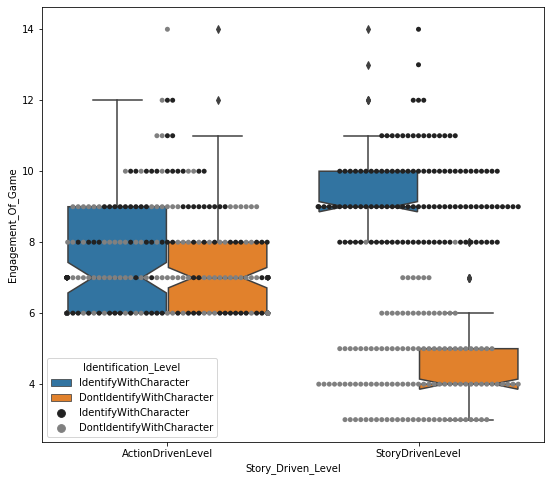

In [4]:
fig, ax = plt.subplots(figsize=(9,8))
sns.boxplot(x='Story_Driven_Level', 
            y='Engagement_Of_Game', 
            hue='Identification_Level', 
            data=factor_data,
            notch=True,
            ax=ax)
sns.swarmplot(x='Story_Driven_Level', 
              y='Engagement_Of_Game', 
              hue='Identification_Level',
              data=factor_data, 
              color="0.5", ax=ax)

Notice the following about in the diagram. Box plots of the engagement show these relationship with respect to how the story is driven. Further, the hue of the boxes and the swarm plot shows the values of engagement for the different levels of identification with the character. 

Let's investigate the relationship of these variables using a linear model. From the chart above the driver of the story appears to be a significant factor. For the story driven game, the idendification with a character seems to be an important factor. The code in the cell below computes a linear model of Engagement_Of_Game by Story_Driven_Level and Indentification_Level, and displays a summary. Execute this code and examine the results. 

In [5]:
factor_data['Engagement_Of_Game'] = factor_data['Engagement_Of_Game'].astype(float)
ols_mod = smf.ols(formula='Engagement_Of_Game ~ C(Story_Driven_Level) + C(Identification_Level)', data=factor_data)
factor_model = ols_mod.fit()
factor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Engagement_Of_Game   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     124.7
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           2.71e-44
Time:                        08:48:25   Log-Likelihood:                -961.76
No. Observations:                 480   AIC:                             1930.
Df Residuals:                     477   BIC:                             1942.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            6.2875      0.142     44.181      0.000       6.008       6.567
C(Story_Driven_Level)[T.StoryDrivenLevel]           -0.6000      0.164     -3.651      0.000      -0.923      -0.277
C(Identification_Level)[T.IdentifyWithCharacter]     2.5250      0.164     15.365      0.000       2.202       2.848
==============================================================================
Omnibus:                       11.300   Durbin-Watson:                   1.121
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.431
Skew:                           0.368   Prob(JB):                      0.00330
Kurtosis:                       3.171   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model does not appear to fit the model very well. The R-squared value is rather small.  

It is likely that there is an **interaction term**. To test this idea create code including the interaction term in the cell below. Execute your code and examine the summary of the model.

> Note: In the R formula language, the $*$ operator expands to all first order terms plus all second order interaction terms. For example, if $a:b$ is the interaction term, the expansion can be writen, $a*b = a + b + a:b$.

In [10]:
ols_mod_interaction = smf.ols(formula='Engagement_Of_Game ~ C(Story_Driven_Level) * C(Identification_Level)', \
                              data=factor_data)
factor_model_interaction = ols_mod_interaction.fit()
factor_model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Engagement_Of_Game   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     280.9
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          6.64e-105
Time:                        08:50:00   Log-Likelihood:                -818.16
No. Observations:                 480   AIC:                             1644.
Df Residuals:                     476   BIC:                             1661.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================================
                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                      7.4917      0.122     61.424      0.000       7.252       7.731
C(Story_Driven_Level)[T.StoryDrivenLevel]                                                     -3.0083      0.172    -17.441      0.000      -3.347      -2.669
C(Identification_Level)[T.IdentifyWithCharacter]                                               0.1167      0.172      0.676      0.499      -0.222       0.456
C(Story_Driven_Level)[T.StoryDrivenLevel]:C(Identification_Level)[T.IdentifyWithCharacter]     4.8167      0.244     19.746      0.000       4.337       5.296
==============================================================================
Omnibus:                       71.461   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.305
Skew:                           0.978   Prob(JB):                     8.24e-24
Kurtosis:                       4.220   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Which effects have large coefficients? What does this observation tell you about the importance of the interaction term?

##### Copyright 2020, Stephen F. Elston. All rights reserved.